<a href="https://colab.research.google.com/github/Zakaal/PCVK_Ganjil_24_25/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**NAMA : MOCHAMMAD ZAKARO AL FAJRI**

**KELAS : TI - 3F**

**NIM : 2241720175**

**NO.ABSEN : 14**

---

**MODUL 10 – Thresholding, Segmentasi Sederhana**

**1. pastikan bahwa google Colab terhubung dengan Github Anda**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum.**


In [22]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

**3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.**


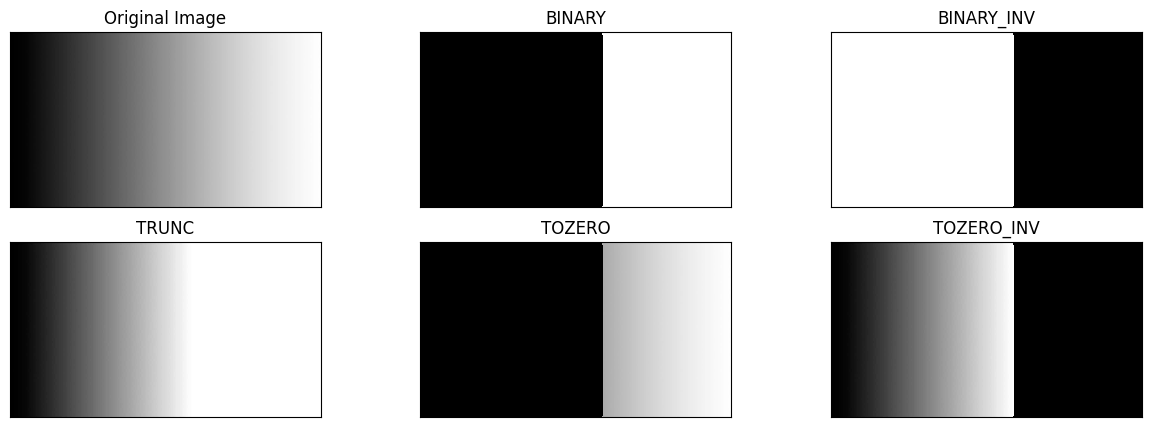

In [11]:
def global_thresholding(image_path, threshold_value):
    # Load the image
    img = cv.imread(image_path, 0)  # Load as grayscale image

    # 1. Binary threshold
    ret, thresh1 = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)

    # 2. Binary threshold inverse
    ret, thresh2 = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY_INV)

    # 3. Threshold Truncate
    ret, thresh3 = cv.threshold(img, threshold_value, 255, cv.THRESH_TRUNC)

    # 4. Threshold Tozero
    ret, thresh4 = cv.threshold(img, threshold_value, 255, cv.THRESH_TOZERO)

    # 5. Threshold Tozero Inverse
    ret, thresh5 = cv.threshold(img, threshold_value, 255, cv.THRESH_TOZERO_INV)

    # Define titles and images for display
    titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

    # Plot images
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], 'gray', interpolation='nearest')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()

image_path = '/content/drive/MyDrive/Images/gradient.jpg'
threshold_value = 170
global_thresholding(image_path, threshold_value)

**4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)**

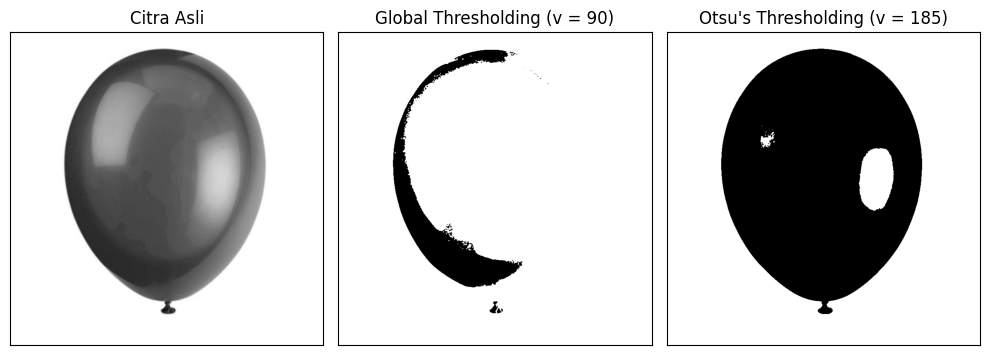

In [18]:
filename = ('/content/drive/MyDrive/Images/balloon.jpg')

img = cv.imread(filename,0)

# Mengaburkan gambar menggunakan GaussianBlur
def manual_gaussian_blur(image, kernel_size=(5,5), sigma=0):
    kernel_x = cv.getGaussianKernel(kernel_size[0], sigma)
    kernel_y = cv.getGaussianKernel(kernel_size[1], sigma)
    kernel = kernel_x * kernel_y.T
    return cv.filter2D(image, -1, kernel)

# Global Thresholding Manual
def manual_threshold(image, thresh):
    result = np.zeros_like(image)
    result[image > thresh] = 255
    return result

# Otsu Thresholding Manual
def otsu_threshold(image):
    # Histogram
    hist, bins = np.histogram(image.flatten(), 256, [0,256])

    # Total number of pixels
    total = image.shape[0] * image.shape[1]

    current_max, threshold = 0, 0
    sumT, sumF, sumB = 0, 0, 0
    weightB, weightF = 0, 0

    for i in range(0, 256):
        sumT += i * hist[i]

    for i in range(0, 256):
        weightB += hist[i]   # Weight Background
        if weightB == 0:
            continue

        weightF = total - weightB   # Weight Foreground
        if weightF == 0:
            break

        sumB += i * hist[i]
        meanB = sumB / weightB      # Mean Background
        meanF = (sumT - sumB) / weightF  # Mean Foreground

        # Between Class Variance
        varBetween = weightB * weightF * (meanB - meanF) ** 2

        # Check if new maximum found
        if varBetween > current_max:
            current_max = varBetween
            threshold = i

    # Apply threshold
    result = manual_threshold(image, threshold)
    return result, threshold

# Gaussian blur manual
blur = manual_gaussian_blur(img, (5, 5), 0)

# Global thresholding manual
thresh = 90
th1 = manual_threshold(blur, thresh)

# Otsu's thresholding manual
th2, ret2 = otsu_threshold(blur)

# Teks untuk Otsu's thresholding
x = "Otsu's Thresholding (v = " + str(ret2) + ")"

# Menampilkan hasil
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize=(10, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

**5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg**

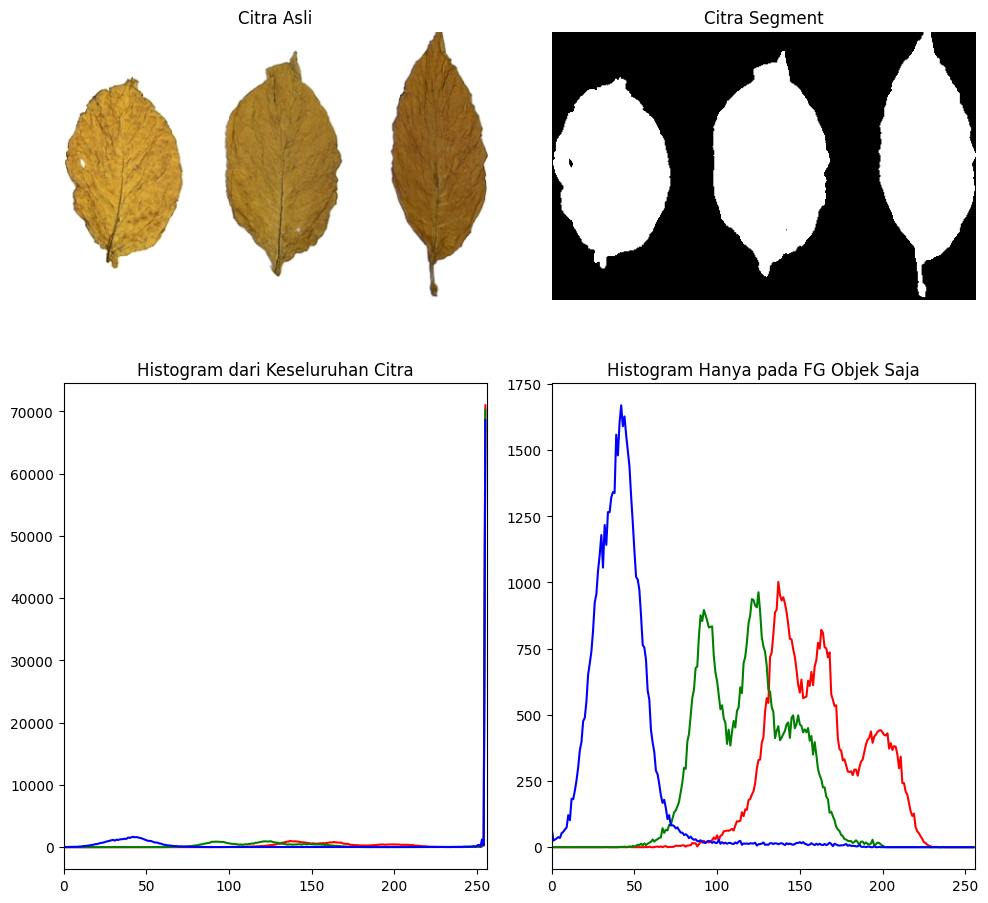

In [24]:
img = cv.imread('/content/drive/MyDrive/Images/tobacco.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi citra ke grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# Buat mask menggunakan thresholding (menggunakan THRESH_BINARY_INV)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

# Menampilkan citra asli dan citra segmentasi (mask)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment')
plt.axis('off')

colors = ('r', 'g', 'b')

# Histogram keseluruhan citra
plt.subplot(2, 2, 3)
for i, col in enumerate(colors):
    hist0 = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist0, color=col)
plt.title('Histogram dari Keseluruhan Citra')
plt.xlim([0, 256])

# Histogram hanya untuk foreground
plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    hist1 = cv.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Histogram Hanya pada FG Objek Saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

**6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)**

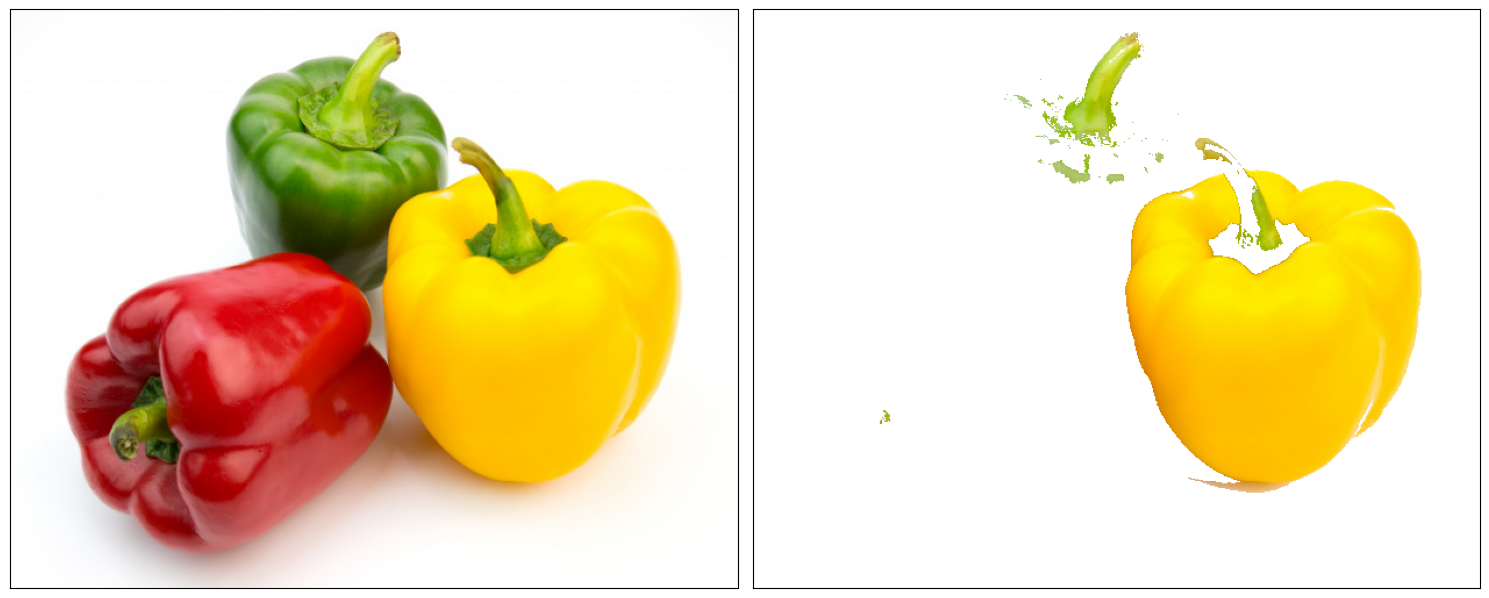

In [26]:
img = cv.imread('/content/drive/MyDrive/Images/peppers.jpg')

# Mengubah citra menjadi dua dimensi untuk K-Means clustering
Z = img.reshape((-1, 3))  # Mengubah menjadi vektor 2D dengan 3 channel warna
Z = np.float32(Z)  # Mengubah tipe data ke float32 untuk K-Means

# K-Means clustering
K = 3  # Kita akan membuat 3 klaster, kamu bisa sesuaikan dengan kebutuhan
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Mengubah hasil klaster menjadi format gambar
centers = np.uint8(centers)  # Kembalikan pusat klaster ke format uint8 (warna asli)
segmented_img = centers[labels.flatten()]  # Buat gambar dari label yang terklasifikasi
segmented_img = segmented_img.reshape(img.shape)

# Menentukan rentang warna kuning dalam format BGR
# Kamu dapat menyesuaikan batas bawah dan atas sesuai dengan citra kamu
lower_yellow = np.array([0, 180, 180])  # Batas bawah warna kuning (BGR)
upper_yellow = np.array([50, 255, 255])  # Batas atas warna kuning (BGR)

# Masking: pilih hanya area yang sesuai dengan warna kuning
mask = cv.inRange(segmented_img, lower_yellow, upper_yellow)
result = cv.bitwise_and(img, img, mask=mask)

# Membuat bagian yang bukan warna kuning menjadi putih
result = img.copy()
result[mask == 0] = [255]

# Menampilkan gambar asli, gambar segmentasi dan hasil masking
plt.figure(figsize=(15,10))

# Gambar Asli
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

# Gambar Hanya Warna Kuning
plt.subplot(122)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

**Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.**


Jawab : Kendalanya berupa dikarenakan titik centroid pada kmeans akan melakukan pemrosesan secara random, Saat menampilkan hasil yang diinginkan mungkin berbeda pada tiap kali program dijalankan.

**7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda.**

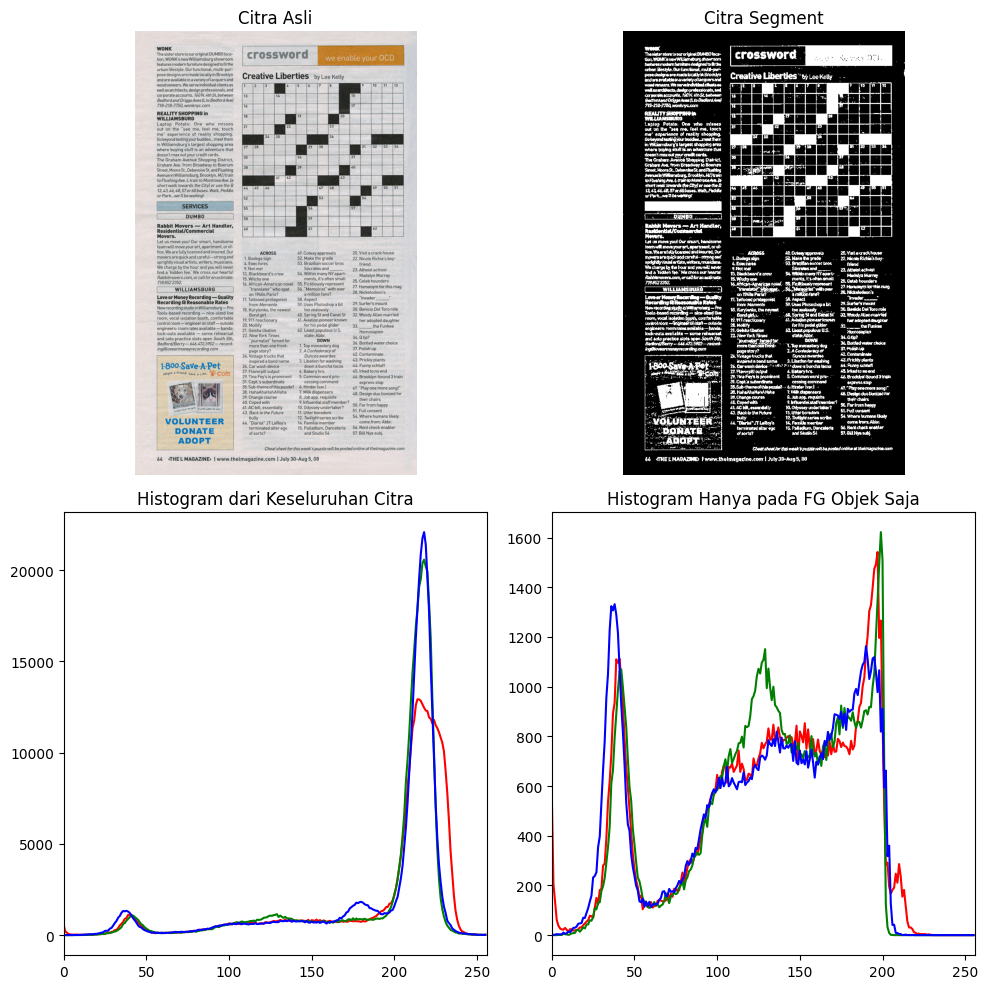

In [ ]:
img = cv.imread('/content/drive/MyDrive/Images/crossword.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi citra ke grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# Buat mask menggunakan thresholding (menggunakan THRESH_BINARY_INV)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

# Menampilkan citra asli dan citra segmentasi (mask)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment')
plt.axis('off')

colors = ('r', 'g', 'b')

# Histogram keseluruhan citra
plt.subplot(2, 2, 3)
for i, col in enumerate(colors):
    hist0 = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist0, color=col)
plt.title('Histogram dari Keseluruhan Citra')
plt.xlim([0, 256])

# Histogram hanya untuk foreground
plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    hist1 = cv.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Histogram Hanya pada FG Objek Saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()
